# Aula 4: Funções de Ativação e Processo de Aprendizado em RNAs


### Funções de Ativação Detalhadas

As funções de ativação desempenham um papel fundamental em redes neurais artificiais ao introduzir não-linearidade, permitindo que o modelo aprenda padrões complexos nos dados. Essa não-linearidade é essencial para tarefas como classificação de imagens, reconhecimento de voz, e outras aplicações de aprendizado profundo que requerem o modelo para capturar relações complexas entre os dados de entrada e saída.

#### Propósito e Mecanismo
- As funções de ativação permitem que as redes neurais superem as limitações dos modelos lineares, introduzindo a capacidade de aprender e representar relações não-lineares entre as entradas e saídas.
- Sem não-linearidade, independentemente de quantas camadas uma rede neural possua, ela se comportaria essencialmente como um modelo linear, limitando severamente sua capacidade de aprendizado.

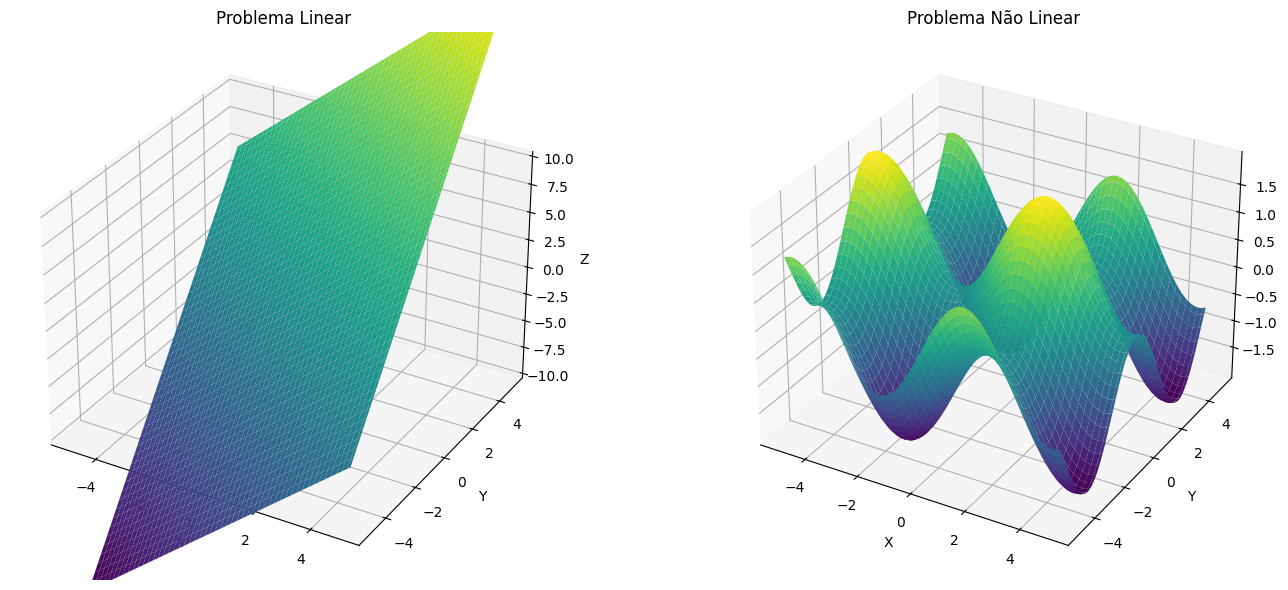

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Problema Linear
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z_linear = 2*X + 3*Y

# Problema Não Linear
Z_nonlinear = np.sin(X) + np.cos(Y)

fig = plt.figure(figsize=(15, 6))

# Gráfico para o problema linear
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_linear, cmap='viridis')
ax1.set_title('Problema Linear')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_zlim(-10, 10)

# Gráfico para o problema não linear
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_nonlinear, cmap='viridis')
ax2.set_title('Problema Não Linear')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()


### Explicação dos Gráficos

Os gráficos gerados representam visualizações tridimensionais de funções matemáticas, demonstrando a diferença entre problemas lineares e não lineares.

#### Problema Linear
No primeiro gráfico, temos uma representação de um problema linear, evidenciado pela equação `Z = 2X + 3Y`. Este é um plano no espaço tridimensional, caracterizado por sua uniformidade e ausência de curvatura. A linearidade indica que as relações entre as variáveis `X`, `Y` e `Z` são diretas, mantendo uma taxa de alteração constante. Isso é típico de sistemas onde a saída é proporcional à entrada, sem elementos de complexidade ou feedback.

#### Problema Não Linear
O segundo gráfico ilustra um problema não linear, utilizando a equação `Z = sin(X) + cos(Y)`. Aqui, a superfície exibida é claramente curva e varia de acordo com as funções seno e cosseno de `X` e `Y`, respectivamente. A não linearidade é evidente pela maneira como a superfície se dobra e oscila, indicando uma relação complexa entre as variáveis onde a saída não varia proporcionalmente às entradas. Problemas não lineares são comuns em fenômenos naturais e sistemas dinâmicos, caracterizados por comportamentos como caos, limites cíclicos e outros padrões complexos que não podem ser descritos por equações lineares simples.

#### Tipos de Funções de Ativação

- **ReLU (Unidade Linear Retificada):**
  - **Uso:** Tornou-se a função de ativação padrão para muitas redes neurais devido à sua simplicidade e eficiência.
  - **Vantagens:** Ajuda a acelerar a convergência durante o treinamento e reduz o problema do desvanecimento de gradiente em comparação à Sigmoid ou Tanh.
  - **Desvantagens:** Neurônios podem se tornar "mortos" durante o treinamento, ou seja, parar de aprender completamente, se mal calibrada.
  - **Quando usar:** Na maioria das camadas ocultas de uma rede neural.

- **Leaky ReLU:**
  - **Uso:** Uma variação da ReLU projetada para mitigar o problema de neurônios mortos, permitindo um pequeno gradiente quando a entrada é menor que zero.
  - **Vantagens:** Reduz o problema de neurônios mortos ao permitir um pequeno gradiente negativo.
  - **Desvantagens:** A escolha do parâmetro de vazamento (leakiness) pode ser arbitrária e requer ajuste fino.
  - **Quando usar:** Como uma alternativa à ReLU, particularmente em redes onde a morte de neurônios se torna um problema.

- **Tanh (Tangente Hiperbólica):**
  - **Uso:** Similar à função sigmoid, mas gera saídas entre -1 e 1. Isso a torna centralizada em zero e, portanto, em geral, mais eficaz que a sigmoid em camadas ocultas.
  - **Vantagens:** Sua natureza centralizada em zero ajuda na eficiência do treinamento.
  - **Desvantagens:** Ainda pode sofrer de desvanecimento de gradiente em redes muito profundas.
  - **Quando usar:** Em camadas ocultas, especialmente se os dados de entrada também forem centralizados e normalizados.

- **Sigmoid:**
  - **Uso:** Tradicionalmente usada em classificação binária para produzir uma saída entre 0 e 1, interpretada como probabilidade.
  - **Vantagens:** Fácil interpretação dos resultados.
  - **Desvantagens:** Suscetível ao desvanecimento de gradiente em redes profundas, o que pode dificultar o treinamento.
  - **Quando usar:** Em camadas de saída de problemas de classificação binária.

- **Softmax:**
  - **Uso:** Comumente usada na camada de saída de redes neurais para tarefas de classificação multiclasse. Ela transforma os logits (valores de entrada brutos de uma camada) em probabilidades, distribuindo-as de forma que a soma de todas as probabilidades de saída seja 1.
  - **Vantagens:** A função Softmax é ideal para lidar com múltiplas classes de forma que cada classe receba uma probabilidade proporcional à sua pontuação. Isso facilita a interpretação dos resultados e a decisão de classificação.
  - **Desvantagens:** A utilização da Softmax na camada de saída pode levar a problemas de desvanecimento ou explosão do gradiente, especialmente com logits muito altos ou baixos, devido à saturação das funções exponenciais.
  - **Quando usar:** Em camadas de saída para problemas de classificação multiclasse, onde é necessário interpretar a saída do modelo como um conjunto de probabilidades.

- **Linear:**
  - **Uso:** Comumente usada em problemas de regressão onde a saída é um valor contínuo. A função de ativação linear é basicamente a função identidade `f(x) = x`, o que significa que a saída é igual à entrada.
  - **Vantagens:** Mantém a linearidade do modelo, o que pode ser vantajoso em tarefas simples de regressão onde não se espera que o relacionamento entre as variáveis seja não linear.
  - **Desvantagens:** Limita a rede neural a modelar apenas relações lineares, o que reduz significativamente a capacidade da rede de capturar complexidades nos dados.
  - **Quando usar:** Geralmente, é usada na camada de saída de problemas de regressão para permitir a previsão de uma gama contínua de valores sem aplicar uma transformação não linear.

Cada função de ativação tem suas peculiaridades e a escolha entre elas depende da arquitetura específica da rede neural e do problema sendo abordado. Experimentar com diferentes funções de ativação e suas configurações é uma prática comum para encontrar o melhor desempenho do modelo.

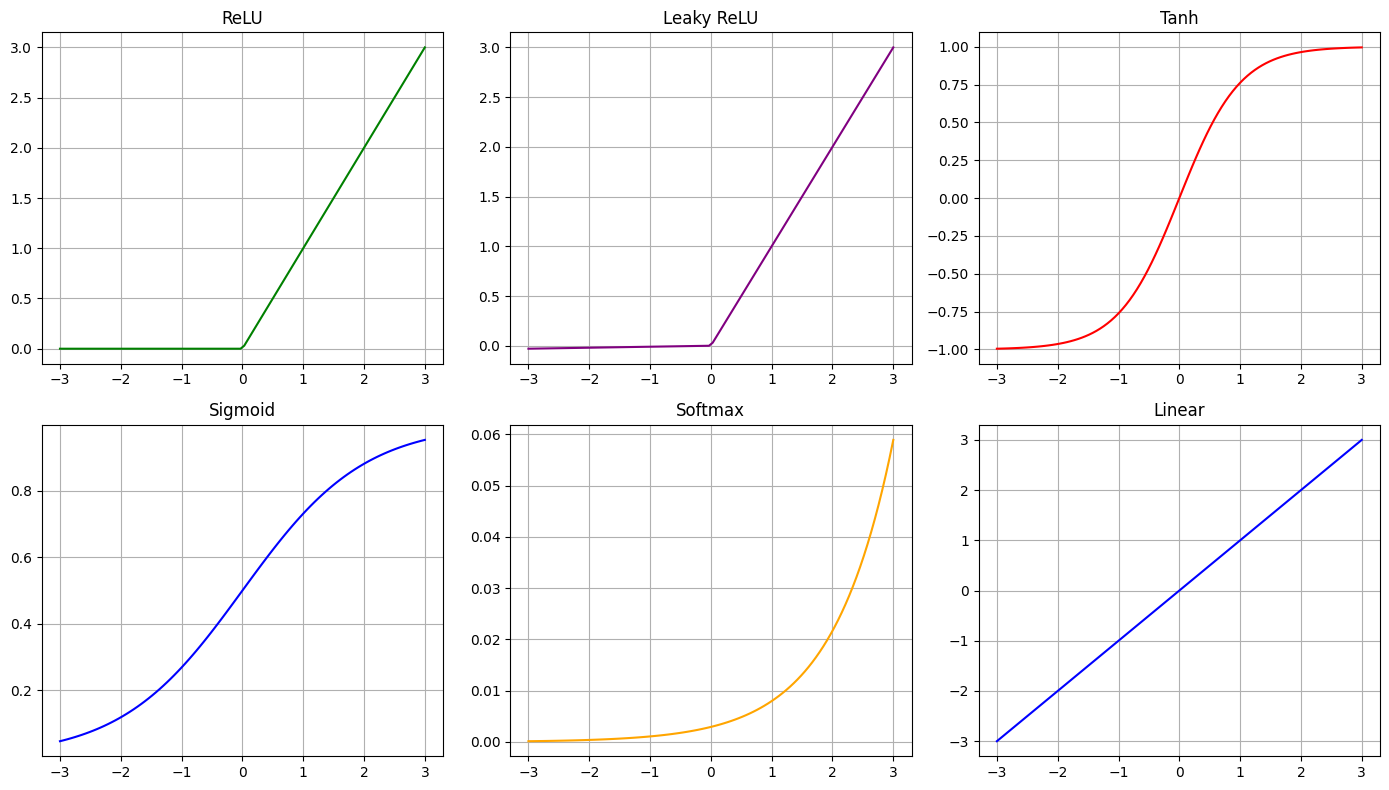

In [2]:
# Definindo as funções de ativação
def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtração para evitar overflow
    return exp_x / exp_x.sum()

def linear(x):
    return x 

# Gerando valores de x
x = np.linspace(-3, 3, 100)

# Plotando as funções de ativação
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.plot(x, relu(x), label="ReLU", color="green")
plt.title("ReLU")
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, leaky_relu(x), label="Leaky ReLU", color="purple")
plt.title("Leaky ReLU")
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, tanh(x), label="Tanh", color="red")
plt.title("Tanh")
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, sigmoid(x), label="Sigmoid", color="blue")
plt.title("Sigmoid")
plt.grid(True)

# Para softmax, é necessário mais de um valor de entrada, portanto, consideramos uma dimensão a mais.
x_softmax = np.linspace(-3, 3, 100).reshape(1, -1)
softmax_vals = softmax(x_softmax).flatten()

plt.subplot(2, 3, 5)
plt.plot(x, softmax_vals, label="Softmax", color="orange")
plt.title("Softmax")
plt.grid(True)

plt.subplot(2, 3, 6)
plt.plot(x, linear(x), label="Sigmoid", color="blue")
plt.title("Linear")
plt.grid(True)

plt.tight_layout()
plt.show()

Os gráficos bidimensionais apresentam as funções de ativação mais comumente utilizadas em redes neurais: Sigmoid, ReLU, Tanh, Leaky ReLU e Softmax. Cada função tem características únicas que influenciam o aprendizado do modelo de maneiras diferentes.



### `ReLU`
A função ReLU (Unidade Linear Retificada) é uma função linear para valores positivos e zero para valores negativos. Sua principal vantagem é a capacidade de acelerar a convergência do treinamento em comparação com a Sigmoid e a Tanh, embora possa levar ao problema de neurônios mortos.

### `Leaky ReLU`
A Leaky ReLU é uma variação da ReLU que permite um pequeno gradiente para valores negativos, reduzindo o problema de neurônios mortos. Isso é conseguido introduzindo um pequeno coeficiente para valores negativos.

### `Tanh`
A função Tanh (Tangente Hiperbólica) é semelhante à Sigmoid, mas produz saídas que variam de -1 a 1. Isso a torna mais eficaz que a Sigmoid em camadas ocultas, especialmente quando os dados estão centralizados em torno de zero.

### `Sigmoid`
A função Sigmoid é suave e produz uma saída entre 0 e 1, o que a torna adequada para problemas de classificação binária e para interpretar a saída como probabilidade. No entanto, ela pode sofrer de desvanecimento do gradiente em redes profundas.

### `Softmax`
A função Softmax é utilizada na camada de saída de redes neurais para tarefas de classificação multiclasse. Ela converte os logits (valores de entrada brutos) em probabilidades para cada classe, garantindo que a soma de todas as probabilidades seja 1.

### `Linear`
A função Linear é essencialmente a função de ativação mais simples, onde a saída é igual à entrada. É frequentemente usada em camadas de saída para problemas de regressão, onde a não-linearidade não é desejada. Sua principal característica é não alterar os dados de entrada, mantendo uma relação direta e proporcional entre a entrada e a saída, o que facilita a interpretação dos resultados em tarefas como previsão de valores contínuos.

Cada função de ativação tem seu papel e utilidade, dependendo do tipo de problema que está sendo resolvido e da arquitetura da rede neural em questão. A escolha da função de ativação adequada pode impactar significativamente o desempenho e a eficácia do modelo de aprendizado de máquina.


In [3]:
# Exemplo 1: Classificação Binária (ex: Detecção de Spam)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Estrutura
model_bin = Sequential([
    Dense(16, activation='relu', input_shape=(100,)),  # Camada oculta com ReLU, adequada para não-linearidade
    Dense(1, activation='sigmoid')  # Camada de saída com Sigmoid para classificação binária (Spam ou Não Spam)
])
# ReLU é escolhida por sua eficiência em adicionar não-linearidade sem sofrer do problema do gradiente desvanecente.
# Sigmoid é usada na saída para obter uma probabilidade entre 0 e 1.

# Exemplo 2: Classificação Multiclasse (ex: Reconhecimento de Dígitos)
model_multi = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Camada oculta com ReLU
    Dense(10, activation='softmax')  # Camada de saída com Softmax para classificação de 10 classes (dígitos de 0 a 9)
])
# Softmax na camada de saída distribui a probabilidade entre várias classes, ideal para classificação multiclasse.

# Exemplo 3: Regressão (ex: Previsão do Preço de Casas)
model_reg = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),  # Camada oculta com ReLU
    Dense(1)  # Camada de saída sem função de ativação para regressão (preço da casa)
])
# Na regressão, a camada de saída geralmente não possui função de ativação para permitir a previsão de valores contínuos.

# Exemplo 4: Processamento de Linguagem Natural (ex: Análise de Sentimento)
model_nlp = Sequential([
    Dense(64, activation='tanh', input_shape=(1000,)),  # Camada oculta com Tanh
    Dense(1, activation='sigmoid')  # Classificação binária (sentimento positivo ou negativo)
])
# Tanh é escolhida pela sua natureza centralizada em zero, o que pode ser benéfico em algumas estruturas de dados de texto.

# Exemplo 5: Reconhecimento de Imagens com Camadas Leaky ReLU
model_img_leaky = Sequential([
    Dense(128, activation='relu', input_shape=(1024,)),  # Primeira camada oculta com ReLU
    Dense(64, activation='leaky_relu'),  # Segunda camada oculta com Leaky ReLU
    Dense(32, activation='leaky_relu'),  # terceira camada oculta com Leaky ReLU
    Dense(10, activation='softmax')  # Classificação multiclasse com Softmax
])
# Leaky ReLU é usada para mitigar o problema de neurônios mortos que podem ocorrer com ReLU.

# Exemplo 6: Modelo Generativo (ex: Geração de Texto)
model_gen = Sequential([
    Dense(256, activation='relu', input_shape=(100,)),  # Camada oculta com ReLU
    Dense(5000, activation='softmax')  # Camada de saída com Softmax para gerar a próxima palavra em um vocabulário de 5000 palavras
])
# Softmax é usada para selecionar a próxima palavra com base em uma distribuição de probabilidade.

# Exemplo 7: Detecção de Anomalias em Séries Temporais
model_anom = Sequential([
    Dense(64, activation='relu', input_shape=(30,)),  # Camada oculta com ReLU
    Dense(1, activation='sigmoid')  # Detecção binária de anomalia (normal ou anômalo)
])

# Exemplo 8: Sistema de Recomendação
model_rec = Sequential([
    Dense(128, activation='relu', input_shape=(50,)),  # Camada oculta com ReLU
    Dense(10, activation='softmax')  # Camada de saída com Softmax para recomendar um dos 10 produtos
])

# Exemplo 9: Classificação de Sentimentos em Tweets
model_tweet = Sequential([
    Dense(128, activation='tanh', input_shape=(300,)),  # Camada oculta com Tanh
    Dense(64, activation='tanh'),  # Camada oculta com Tanh
    Dense(32, activation='tanh'),  # Camada oculta com Tanh
    Dense(16, activation='tanh'),  # Camada oculta com Tanh
    Dense(3, activation='softmax')  # Classificação multiclasse (positivo, neutro, negativo)
])

# Exemplo 10: Previsão de Séries Temporais (ex: Ações)
model_stock = Sequential([
    Dense(64, activation='relu', input_shape=(60,)),  # Últimos 60 dias como entrada, usando ReLU para camada oculta
    Dense(1)  # Previsão do preço da ação no próximo dia (valor contínuo, sem função de ativação específica)
])
# Neste exemplo de regressão para previsão de séries temporais, a última camada é linear, permitindo a previsão de um valor contínuo.

### Processo de Aprendizado

O processo de aprendizado em redes neurais é fundamentalmente sobre o ajuste iterativo de pesos e biases, visando minimizar a diferença entre as previsões do modelo e os valores reais. Esse processo envolve conceitos-chave como perda, custo e otimização, cada um desempenhando um papel crucial na eficácia do treinamento da rede.

#### Ajuste de Pesos e Bias
- **Mecanismo:** A cada iteração de treinamento, o modelo ajusta seus pesos e biases com base no gradiente da função de perda, um processo conhecido como retropropagação (``backpropagation``).
- **Objetivo:** O objetivo é reduzir o erro nas previsões do modelo, ajustando os pesos (a importância dada a cada característica de entrada) e os biases (valores de ajuste que permitem que o modelo se ajuste melhor aos dados).


### Função de Perda e Gradiente da Função de Perda

A otimização de redes neurais envolve minimizar uma função de perda, também conhecida como função de custo, que mede a discrepância entre as previsões do modelo e os valores reais dos dados. O gradiente da função de perda desempenha um papel crucial neste processo, orientando a atualização dos pesos da rede para melhorar seu desempenho.

### Função de Perda

- **Definição:** A função de perda quantifica a diferença entre a saída prevista pelo modelo e o valor real esperado. Em outras palavras, mede o "erro" do modelo.
- **Objetivo:** O principal objetivo durante o treinamento de uma rede neural é minimizar a função de perda, ou seja, reduzir o erro do modelo.
- **Tipos Comuns:**
  - **Erro Quadrático Médio (MSE):** Usado principalmente em problemas de regressão.
  - **Entropia Cruzada:** Usada em problemas de classificação, tanto binária (Binary Cross-Entropy) quanto multiclasse (Categorical Cross-Entropy).

### Gradiente da Função de Perda

- **Definição:** O gradiente de uma função de perda em relação aos pesos da rede indica a direção na qual os pesos devem ser ajustados para minimizar a perda.
- **Cálculo:** O gradiente é calculado através da derivada da função de perda em relação a cada peso, o que mostra como uma pequena mudança em um peso afeta o valor da função de perda.
- **Utilização no Treinamento:**
  - **Retropropagação:** O processo de ajustar os pesos da rede com base no gradiente da função de perda é conhecido como retropropagação. Utilizando algoritmos de otimização (como SGD, Adam), os pesos são atualizados na direção oposta ao gradiente para alcançar a minimização da perda.

### Importância do Gradiente

- **Direção e Magnitude:** O gradiente não apenas indica a direção na qual a função de perda aumenta ou diminui, mas também a velocidade dessa mudança (magnitude do gradiente).
- **Ponto de Mínimo:** Em um mínimo local ou global, o gradiente da função de perda é zero, indicando que pequenas variações nos pesos não melhoram nem pioram significativamente o desempenho do modelo.

### Desafios

- **Mínimos Locais vs. Global:** Um dos principais desafios na otimização de redes neurais é evitar ficar preso em mínimos locais enquanto se busca o mínimo global, que representa a solução ótima.
- **Desvanecimento/Explosão dos Gradientes:** Grandes variações nos valores do gradiente podem causar instabilidade no treinamento, conhecidas como problemas de desvanecimento ou explosão dos gradientes.

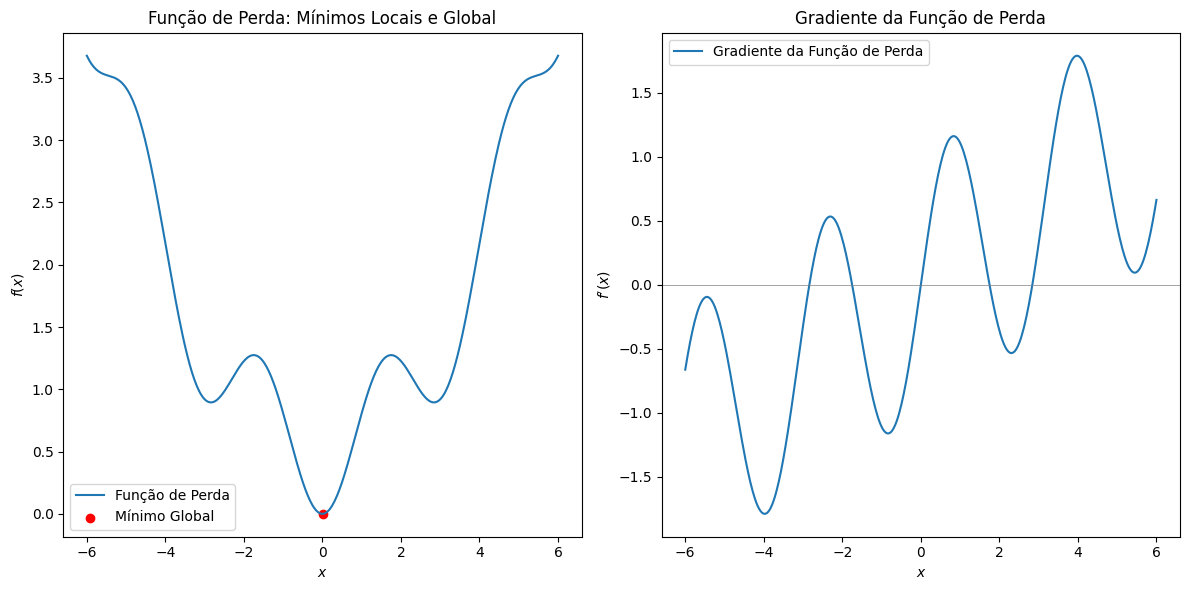

In [4]:
# Simulação de uma função de perda complexa com múltiplos mínimos locais e um mínimo global distinto
x = np.linspace(-6, 6, 400)
y = np.sin(x)**2 + 0.1*(x**2)

# Calculando o gradiente da função de perda manualmente para simplificar
grad_y = 2*np.sin(x)*np.cos(x) + 0.2*x

plt.figure(figsize=(12, 6))

# Plotando a função de perda com múltiplos mínimos locais e um mínimo global
plt.subplot(1, 2, 1)
plt.plot(x, y, label="Função de Perda")
min_global_x = x[np.argmin(y)]
min_global_y = np.min(y)
plt.scatter(min_global_x, min_global_y, color='red', label="Mínimo Global")
plt.title("Função de Perda: Mínimos Locais e Global")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()

# Plotando o gradiente da função de perda
plt.subplot(1, 2, 2)
plt.plot(x, grad_y, label="Gradiente da Função de Perda")
plt.title("Gradiente da Função de Perda")
plt.xlabel("$x$")
plt.ylabel("$f'(x)$")
plt.axhline(0, color='gray', lw=0.5)  # Linha y=0 para referência
plt.legend()

plt.tight_layout()
plt.show()



#### Perda e Custo em Profundidade
- **Perda (Loss):**
  - **Definição:** A perda é calculada como a diferença entre a saída prevista pelo modelo e a saída real/verdadeira.
  - **Funções de Perda Comuns:** 
    - **MSE (Mean Squared Error):** Usado em problemas de regressão, calcula o quadrado da diferença entre previsões e valores reais.
    - **Cross-Entropy:** Usado em classificação, mede a diferença entre duas distribuições de probabilidade para a variável de saída.
- **Custo (Cost):**
  - **Definição:** O custo é a agregação (geralmente a média) das perdas calculadas para todo o conjunto de dados de treinamento.
  - **Importância:** Fornece uma medida abrangente de quão bem o modelo está performando sobre todo o conjunto de dados.

#### Otimização e Taxa de Aprendizado
- **SGD (Stochastic Gradient Descent):**
  - **Características:** Simples e eficaz, mas pode sofrer de alta variabilidade, o que pode tornar o treinamento inconsistente.
  - **Funcionamento:** Ajusta os pesos em pequenos passos, na direção que minimiza a função de custo, com cada passo proporcional ao negativo do gradiente.
- **Adam (Adaptive Moment Estimation):**
  - **Características:** Combina as técnicas de AdaGrad e RMSProp para ajustar a taxa de aprendizado de cada peso individualmente, o que pode levar a melhores resultados.
  - **Funcionamento:** Mantém uma taxa de aprendizado mais eficiente por adaptar o tamanho dos passos do gradiente para cada parâmetro.
- **Decaimento da Taxa de Aprendizado:**
  - **Definição:** Uma técnica para diminuir a taxa de aprendizado ao longo do tempo.
  - **Benefícios:** Ajuda a assegurar uma convergência mais suave para o mínimo global, evitando passos grandes demais que podem levar a oscilações ou a uma convergência prematura em mínimos locais.

Este processo de aprendizado é iterativo e requer ajustes finos de parâmetros, como a taxa de aprendizado, para alcançar a melhor performance do modelo.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Exemplo 1: Rede Neural para Regressão
model_regress = Sequential([
    Input(shape=(30,)),  # Definindo explicitamente a camada de entrada com 30 features
    Dense(64, activation='relu'),  # Primeira camada oculta com 64 neurônios e ativação ReLU
    Dense(64, activation='relu'),  # Segunda camada oculta
    Dense(64, activation='relu'),  # Terceira camada oculta
    Dense(64, activation='relu'),  # Quarta camada oculta
    Dense(1)  # Camada de saída para regressão, sem função de ativação para prever valores contínuos
])
# Compilando o modelo
model_regress.compile(optimizer=Adam(learning_rate=0.001),
                      loss='mean_squared_error')  # Usando MSE como função de perda para regressão



# Exemplo 2: Rede Neural para Classificação Binária
model_bin_class = Sequential([
    Input(shape=(30,)),
    Dense(64, activation='relu'),  # Utilizando ReLU
    Dense(64, activation='leaky_relu'),  # Alternando para Leaky ReLU
    Dense(64, activation='relu'),  # Voltando para ReLU
    Dense(64, activation='leaky_relu'),  # E Leaky ReLU novamente
    Dense(1, activation='sigmoid')  # Camada de saída com Sigmoid para classificação binária
])
# Compilando o modelo
model_bin_class.compile(optimizer=Adam(learning_rate=0.001),
                        loss='binary_crossentropy',  # Usando entropia cruzada binária
                        metrics=['accuracy'])  # Métrica de acurácia para avaliação



# Exemplo 3: Rede Neural para Classificação de 4 Classes
model_multi_class = Sequential([
    Input(shape=(30,)),
    Dense(64, activation='tanh'),  # Usando Tanh em todas as camadas ocultas
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(4, activation='softmax')  # Camada de saída com Softmax para 4 classes
])
# Compilando o modelo
model_multi_class.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',  # Usando entropia cruzada categórica
                          metrics=['accuracy'])



# Callbacks para todos os modelos
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Exemplo de treinamento (aplicável a qualquer modelo acima)
# model.fit(x_train, y_train, validation_split=0.2, epochs=100, callbacks=[reduce_lr, early_stopping])


### Implementação e Análise de Funções de Ativação

A escolha da função de ativação é uma das decisões mais importantes no projeto de redes neurais, pois influencia diretamente a capacidade do modelo de aprender padrões complexos. O TensorFlow e o Keras fornecem um ambiente robusto para experimentar diferentes funções de ativação, facilitando a comparação de seu impacto no desempenho do modelo. 

#### Uso de TensorFlow/Keras

TensorFlow, com sua interface de alto nível Keras, é uma poderosa biblioteca de aprendizado de máquina que simplifica a construção, treinamento e avaliação de modelos de redes neurais. Para explorar o impacto das funções de ativação, siga os passos detalhados abaixo:

1. **Configuração do Ambiente:**
   - Certifique-se de ter o TensorFlow instalado no seu ambiente de desenvolvimento. Você pode instalá-lo via pip com `pip install tensorflow` ou usar o ambiente do google colab.

2. **Construção da Rede Neural:**
   - Inicie importando os pacotes necessários do Keras: `from tensorflow.keras.models import Sequential` e `from tensorflow.keras.layers import Dense`.
   - Crie um modelo sequencial, que permite construir a rede camada por camada: `model = Sequential()`.

3. **Adicionando Camadas com Funções de Ativação:**
   - Adicione camadas à sua rede usando o método `add()`. Por exemplo, para adicionar uma camada densa (totalmente conectada) com uma função de ativação ReLU, você usaria: `model.add(Dense(64, activation='relu'))`.
   - Repita o processo para experimentar com diferentes funções de ativação para as camadas ocultas.

4. **Compilação do Modelo:**
   - Compile o modelo com um otimizador, uma função de perda e métricas para avaliação: `model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])`.

5. **Treinamento e Avaliação:**
   - Treine o modelo usando `model.fit()`, passando seus dados de treinamento, número de épocas e, opcionalmente, dados de validação.
   - Avalie o desempenho do modelo no conjunto de teste com `model.evaluate()`.

6. **Comparação de Funções de Ativação:**
   - Após treinar modelos separados com diferentes funções de ativação, compare os resultados de precisão e perda para determinar qual função oferece o melhor desempenho para o seu problema específico.

#### Análise de Resultados

- **Interpretação:** Analise os resultados, prestando atenção à precisão e à perda nos conjuntos de treinamento e teste. Funções de ativação diferentes podem levar a resultados distintos, dependendo da natureza do problema e da arquitetura da rede.
- **Decisão:** Escolha a função de ativação que proporciona um equilíbrio ideal entre rapidez no treinamento, precisão e capacidade de generalização.

# Engenharia de Atributos em Aprendizado de Máquina

A engenharia de atributos é um processo fundamental no desenvolvimento de modelos de aprendizado de máquina, que envolve a criação de novos atributos (features) a partir dos dados existentes para melhorar o desempenho do modelo. Este processo não se limita apenas à limpeza e preparação dos dados, como a remoção de valores nulos ou tratamento de outliers, mas estende-se à transformação e criação de novos dados que podem revelar padrões importantes não capturados pelos atributos originais.

## Importância da Engenharia de Atributos

- **Melhoria da Performance do Modelo:** Atributos bem projetados podem significativamente melhorar a capacidade do modelo de aprender padrões complexos, resultando em melhores previsões ou classificações.
- **Redução da Complexidade do Modelo:** Atributos mais informativos podem reduzir a necessidade de modelos excessivamente complexos, o que, por sua vez, pode diminuir o risco de overfitting.
- **Insights de Domínio:** A criação de novos atributos frequentemente requer um conhecimento profundo do domínio do problema, o que pode levar à descoberta de insights valiosos sobre os dados.

## Exemplos de Técnicas de Engenharia de Atributos

- **Binning:** Transformação de variáveis contínuas em categóricas, agrupando-os em diferentes 'bins' ou categorias.
- **One-Hot Encoding:** Transformação de variáveis categóricas em um formato que possa ser fornecido aos algoritmos de ML, criando uma coluna binária para cada categoria.
- **Feature Interaction:** Criação de novos atributos que são combinações de dois ou mais atributos existentes, capturando interações entre eles que podem ser relevantes para a tarefa de predição.
- **Polynomial Features:** Geração de atributos que são potências ou combinações polinomiais dos atributos existentes, útil em modelos lineares para capturar relações não lineares.
- **Extração de Atributos de Data/Hora:** Transformação de timestamps em componentes mais úteis, como hora do dia, dia da semana, mês, ou até mesmo feriados.

## Desafios na Engenharia de Atributos

- **Dimensionalidade:** A criação de um grande número de atributos pode levar à alta dimensionalidade, o que pode aumentar a complexidade do modelo e o risco de overfitting.
- **Relevância:** Nem todos os atributos criados serão úteis para o modelo, exigindo técnicas de seleção de atributos para identificar aqueles que realmente contribuem para o poder preditivo.
- **Custo Computacional:** O processo de criação e teste de novos atributos pode ser computacionalmente intensivo, especialmente com grandes volumes de dados.

Em resumo, a engenharia de atributos é uma etapa crucial no processo de modelagem em aprendizado de máquina, requerendo criatividade, conhecimento de domínio e experimentação cuidadosa para melhorar a qualidade e a eficácia dos modelos preditivos.

In [6]:
import pandas as pd

df = pd.read_csv('uber.csv')
df.head()

,index,id,valor,data_hora,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,qtd_passageiros
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
# Remove as colunas irrelevantes
df.drop(['index','id'], axis = 1, inplace = True)
df.head()

,valor,data_hora,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,qtd_passageiros
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   valor              200000 non-null  float64
 1   data_hora          200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   qtd_passageiros    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [9]:
# Remove a linha que possuia valores nulos
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   valor              199999 non-null  float64
 1   data_hora          199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   qtd_passageiros    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [10]:
# Convertendo a coluna 'data_hora' de string para datetime, removendo ' UTC'
df['data_hora'] = pd.to_datetime(df['data_hora'].str[:-4])

# Criando colunas adicionais com informações de dia do mês, dia da semana, dia do ano, hora e minuto
df['dia_do_mes'] = df['data_hora'].dt.day
df['dia_da_semana'] = df['data_hora'].dt.dayofweek  # Segunda é 0 e Domingo é 6
df['dia_do_ano'] = df['data_hora'].dt.dayofyear
df['hora'] = df['data_hora'].dt.hour
df['minuto'] = df['data_hora'].dt.minute

In [11]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calcula a distância do círculo grande entre dois pontos 
    na Terra (especificados em graus decimais).
    """
    # Converte graus decimais para radianos
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Fórmula de Haversine
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Raio da Terra em quilômetros
    return c * r

# Descobrir a Distância em linha reta em quilometros entre o Ponto de embarque e de desembarque
df['distance'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], 
                                                row['dropoff_longitude'], row['dropoff_latitude']), axis=1)
df.head()

,valor,data_hora,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,qtd_passageiros,dia_do_mes,dia_da_semana,dia_do_ano,hora,minuto,distance
0,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,7,3,127,19,52,1.683323
1,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,17,4,198,20,4,2.457590
2,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,24,0,236,21,45,5.036377
3,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,26,4,177,8,22,1.661683
4,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,28,3,240,17,47,4.475450


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Separar X e y
X = df.drop(['valor','data_hora'], axis = 1)
y = df[['valor']]

# Separa X e y de treinamento (50%) validação (30%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=81)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=6/10, random_state=81)

# Normaliza os dados de X
scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train)
X_val = scaler_x.transform(X_val)
X_test = scaler_x.transform(X_test)

# Normaliza os dados de y (para regressão)
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)
y_val = scaler_y.transform(y_val)
y_test = scaler_y.transform(y_test)

In [13]:
print(f'Maior Valor de y de Treinamento {y_train.max()}')
print(f'Menor Valor de y de Treinamento {y_train.min()}')
print(f'Maior Valor de y de Validação {y_val.max()}')
print(f'Menor Valor de y de Validação {y_val.min()}')
print(f'Maior Valor de y de Teste {y_test.max()}')
print(f'Menor Valor de y de Teste {y_test.min()}')

Maior Valor de y de Treinamento 1.0
Menor Valor de y de Treinamento 0.0
Maior Valor de y de Validação 0.7295825771324864
Menor Valor de y de Validação 0.0
Maior Valor de y de Teste 0.5934664246823956
Menor Valor de y de Teste 0.002722323049001815


In [14]:
X_train.shape

(99999, 11)

In [15]:
X_train.shape[1]

11

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Definindo a arquitetura da rede neural
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Camada de entrada e primeira camada oculta
    Dense(64, activation='relu'),  # Segunda camada oculta
    Dense(32, activation='relu'),  # Terceira camada oculta
    Dense(1)  # Camada de saída
])

# Compilando o modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error')

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [17]:
# Treinamento do modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=15, batch_size=64,
                    callbacks=[reduce_lr, early_stopping])

Epoch 1/15


1563/1563 [==============================] - 4s 2ms/step - loss: 3.5687e-04 - val_loss: 3.2730e-04 - lr: 0.0010
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 3.3200e-04 - val_loss: 3.1937e-04 - lr: 0.0010
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 3.2895e-04 - val_loss: 3.2748e-04 - lr: 0.0010
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 3.2540e-04 - val_loss: 3.1869e-04 - lr: 0.0010
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 3.2054e-04 - val_loss: 3.1770e-04 - lr: 2.0000e-04
Epoch 6/15
1563/1563 [==============================] - 4s 2ms/step - loss: 3.2058e-04 - val_loss: 3.1828e-04 - lr: 2.0000e-04
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 3.2067e-04 - val_loss: 3.1784e-04 - lr: 2.0000e-04
Epoch 8/15
1563/1563 [==============================] - 3s 2ms/step - loss: 3.1984e-04 - val_loss: 3.1821e-04 - lr: 1.0000e-04
Epoch 9/15


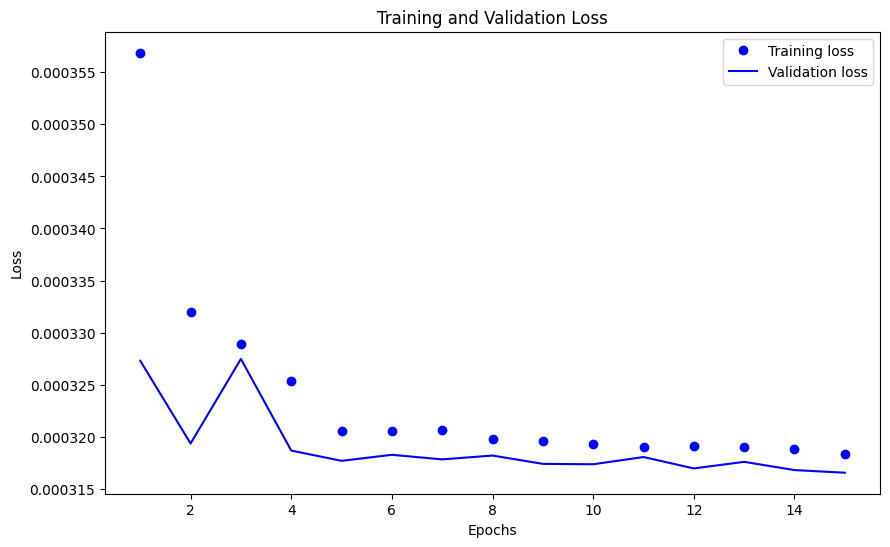

In [18]:
# Plotando o histórico de treinamento
import matplotlib.pyplot as plt

# Extrai as métricas do histórico
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))

# Plotando a loss do treinamento e da validação
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [19]:
# Avaliando o modelo no conjunto de teste
y_pred = model.predict(X_test)

# Desnormalizando as previsões e os valores de y_test
y_pred_desnorm = scaler_y.inverse_transform(y_pred)
y_test_desnorm = scaler_y.inverse_transform(y_test)

# Calculando métricas de regressão com os dados desnormalizados
mse = mean_squared_error(y_test_desnorm, y_pred_desnorm)
mae = mean_absolute_error(y_test_desnorm, y_pred_desnorm)
r2 = r2_score(y_test_desnorm, y_pred_desnorm)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')


1875/1875 [==============================] - 2s 1ms/step
MSE: 99.65482986118657
MAE: 6.135658608823776
R^2: 0.005548054510395084


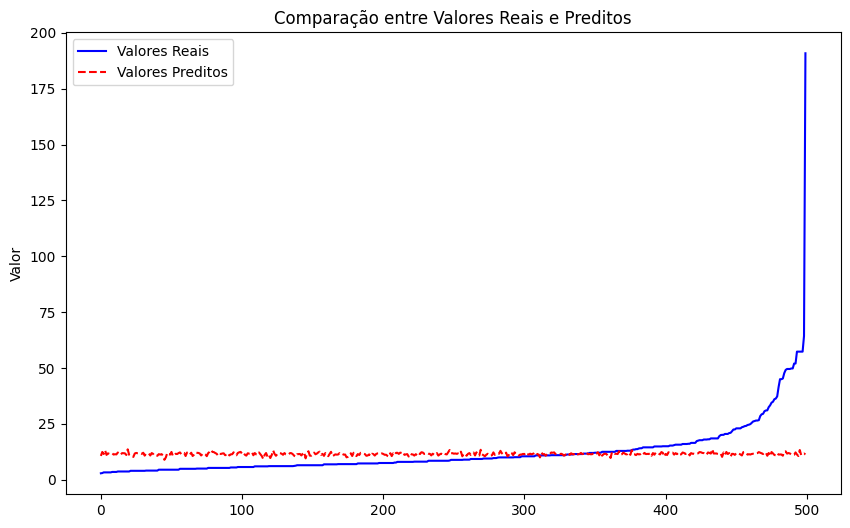

In [20]:
# Supondo que 'y_pred_desnorm' e 'y_test_desnorm' sejam os arrays com os valores preditos e reais desnormalizados
import pandas as pd

# Criando um DataFrame com os valores preditos e reais
df_results = pd.DataFrame({'Valores Reais': y_test_desnorm.flatten(), 'Valores Preditos': y_pred_desnorm.flatten()})
df_results = df_results.sample(frac=1, random_state=70)
df_results = df_results[:500]
# Ordenando o DataFrame pelos valores reais
df_results_sorted = df_results.sort_values('Valores Reais').reset_index(drop=True)

# Plotando os valores reais e os preditos
plt.figure(figsize=(10, 6))
plt.plot(df_results_sorted.index, df_results_sorted['Valores Reais'], label='Valores Reais', color='blue')
plt.plot(df_results_sorted.index, df_results_sorted['Valores Preditos'], label='Valores Preditos', color='red', linestyle='--')
plt.title('Comparação entre Valores Reais e Preditos')
plt.ylabel('Valor')
plt.legend()
plt.show()


# Classificação

In [21]:
df.qtd_passageiros.value_counts()

qtd_passageiros
1    138425
2     29429
5     14009
3      8881
4      4276
6      4271
0       708
Name: count, dtype: int64

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Separar X e y
X = df.drop(['qtd_passageiros','data_hora'], axis = 1)
y = df[['qtd_passageiros']]

# Separa X e y de treinamento (50%) validação (30%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=81)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=6/10, random_state=81)

# Na Classificação Normaliza Apenas os dados de X
scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train)
X_val = scaler_x.transform(X_val)
X_test = scaler_x.transform(X_test)

# Convertendo o y para categórico
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

In [24]:
# Definindo a rede neural
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')  # O número de neurônios corresponde ao número de classes
])

In [25]:
y_train_cat.shape[1]

7

In [26]:
# Compilando o modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [27]:
# Treinando o modelo
history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat),
                    epochs=15, batch_size=64, callbacks=[reduce_lr, early_stopping])

Epoch 1/15


1563/1563 [==============================] - 5s 2ms/step - loss: 1.0598 - accuracy: 0.6885 - val_loss: 1.0489 - val_accuracy: 0.6914 - lr: 0.0010
Epoch 2/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0475 - accuracy: 0.6907 - val_loss: 1.0463 - val_accuracy: 0.6914 - lr: 0.0010
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0465 - accuracy: 0.6907 - val_loss: 1.0438 - val_accuracy: 0.6914 - lr: 0.0010
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0456 - accuracy: 0.6907 - val_loss: 1.0437 - val_accuracy: 0.6914 - lr: 0.0010
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0452 - accuracy: 0.6907 - val_loss: 1.0424 - val_accuracy: 0.6914 - lr: 0.0010
Epoch 6/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0449 - accuracy: 0.6907 - val_loss: 1.0426 - val_accuracy: 0.6914 - lr: 0.0010
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step -

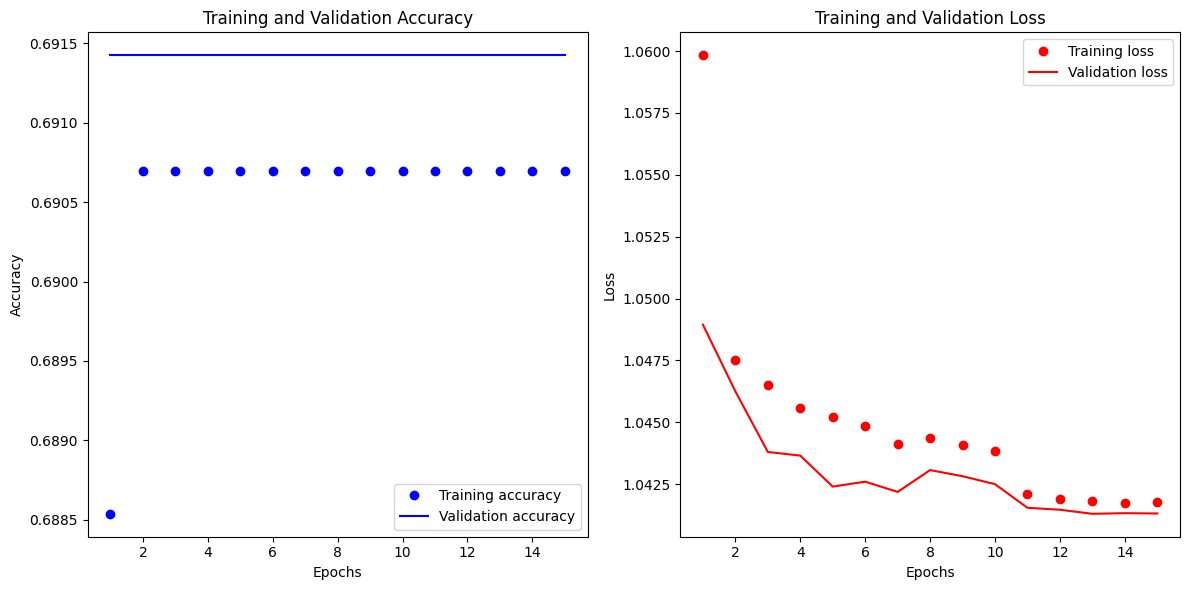

In [28]:
# Acessando os dados de histórico
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

# Plotando a acurácia de treinamento e validação
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotando o loss de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
# Avaliando o modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

1875/1875 [==============================] - 3s 2ms/step


In [30]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       213
           1       0.69      1.00      0.82     41699
           2       0.00      0.00      0.00      8809
           3       0.00      0.00      0.00      2676
           4       0.00      0.00      0.00      1217
           5       0.00      0.00      0.00      4121
           6       0.00      0.00      0.00      1265

    accuracy                           0.69     60000
   macro avg       0.10      0.14      0.12     60000
weighted avg       0.48      0.69      0.57     60000



C:\Users\LeaoN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LeaoN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LeaoN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

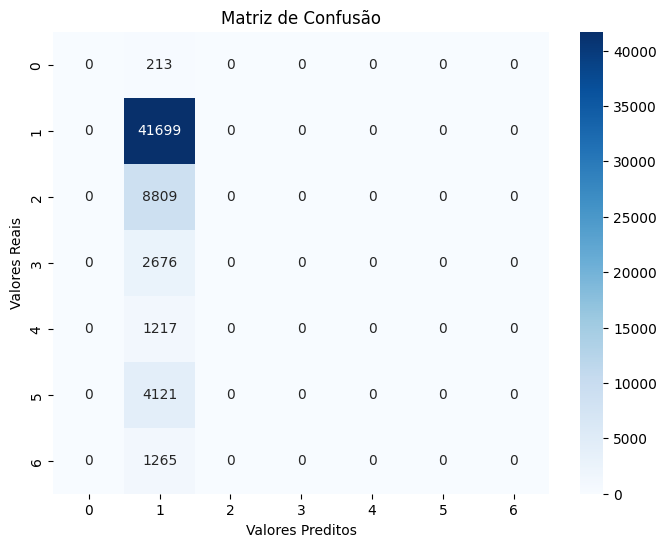

In [31]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plotando a matriz de confusão com gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Valores Reais')
plt.xlabel('Valores Preditos')
plt.show()

# Exercícios Valendo um UPGRADE na nota da primeira prova

1 - Leia a base de dados 'preco_passagem.csv'

2 - crie uma coluna que calcula quantos dias tem de diferença entre a data da compra e a data do voo

3 - crie uma coluna com o nome da empresa aérea (primeira parte da coluna Airline-Class)

4 - crie uma coluna com o nome da classe da passagem (terceira parte da coluna Airline-Class)

5 - Crie uma Coluna com a hora da partida (apenas a hora, desconsiderar os minutos)

6 - Crie uma Coluna com a hora da chegada (apenas a hora, desconsiderar os minutos)

7 - Crie uma coluna de tempo_viagem_minutos com o total de minutos da viagem

8 - Crie uma coluna qtd_paradas com as quantias numéricas de paradas (conexões que o voo faz até o destino final) (0 se for voo direto, 1 se for com uma parada ...)

9 - A coluna valor é a classe alvo, mas ela veio com separador de milhar. Arrume para que a ela possua apenas numeros inteiros

10 - Separe os dados em X e y, sendo X todas as colunas que você criou e y a coluna valor

11 - Separe os dados em X e y de treinamento (50%), validação (20%) e teste (30%)

12 - Normalize os valores de X e y de treinamento, validação e teste

13 - Defina uma rede neural para regressão com no mínimo 3 camadas ocultas

14 - Defina a paciência da redução da taxa de aprendizado em 5 e da parada antecipada do treinamento em 10 épocas

15 - Coloque o modelo para treinar por 100 épocas com os callbacks de ReduceLROnPlateau e EarlyStopping definidos

16 - Exiba um gráfico com o o Loss nos dados de treinamento e validação ao longo das épocas

17 - Exiba as métricas de MSE, MAE e Score R².

18 - Faça um gráfico exibindo a comparação dos valores reais e preditos nos dados de teste (usando apenas 500 amostras do total)


# REQUISITOS PARA GANHAR O UPGRADE NA NOTA

Para ter direito ao upgrade na nota, siga atentamente as instruções abaixo. Estas regras são projetadas para garantir que todos tenham uma chance justa e demonstrem seu conhecimento e habilidades de maneira eficaz.

- **Início do Exercício:**
  - Todos os alunos devem iniciar o exercício **durante a aula**. É importante demonstrar comprometimento e aproveitar o tempo em sala para esclarecer dúvidas e progredir no exercício.

- **Apresentação do Notebook:**
  - O notebook contendo todas as soluções, incluindo saídas como métricas e gráficos, deve ser apresentado **exclusivamente na aula do dia 19/03/2024**.
  - A apresentação será realizada **somente no horário de 08:00 às 08:35**. Certifique-se de estar preparado(a) e disponível neste período para mostrar seu trabalho.

- **Conhecimento do Código:**
  - Se perguntado sobre qualquer parte do código durante sua apresentação, você deve ser capaz de explicar seu funcionamento e propósito claramente.
  - A incapacidade de responder às perguntas sobre o código que você apresenta resultará na **não consideração do upgrade na nota**. É fundamental que você entenda completamente o trabalho que está apresentando.

- **Estrutura do Arquivo:**
  - Durante o desenvolvimento do exercício, é permitido criar blocos de código adicionais para testes. No entanto, ao preparar o notebook para apresentação, **não altere a estrutura original** do arquivo fornecido. Os enunciados (blocos de markdown - texto) e os blocos de código fornecidos devem permanecer intactos.
  - **Não exclua** nenhum bloco de código ou de texto existente e **não adicione** novos blocos de código além do que foi fornecido para cada questão. Para a entrega, cada questão deve ser respondida em seu respectivo bloco de código único designado para ela.

Cumprir estes requisitos demonstrará não apenas sua habilidade técnica, mas também seu comprometimento e preparação para a aula. Boa sorte a todos!

# 0 - Importe as bibliotecas aqui

In [32]:
# Desenvolva seu código aqui
import pandas as pd

### 1 - Leia a base de dados 'preco_passagem.csv'

In [33]:
# Desenvolva sei código aqui
df = pd.read_csv("preco_passagem.csv")
df.head()

,data_comprou,data_voo,Airline-Class,hora_partida,hora_chegada,tempo_viagem,total_paradas,valor
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"



### 2 - crie uma coluna que calcula quantos dias tem de diferença entre a data da compra e a data do voo


In [34]:
# Desenvolva sei código aqui
df['data_comprou'] = pd.to_datetime(df['data_comprou'])
df['data_voo'] = pd.to_datetime(df['data_voo'])

C:\Users\LeaoN\AppData\Local\Temp\ipykernel_22184\1730827115.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data_comprou'] = pd.to_datetime(df['data_comprou'])
C:\Users\LeaoN\AppData\Local\Temp\ipykernel_22184\1730827115.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data_voo'] = pd.to_datetime(df['data_voo'])


In [35]:
df.dtypes

data_comprou     datetime64[ns]
data_voo         datetime64[ns]
Airline-Class            object
hora_partida             object
hora_chegada             object
tempo_viagem             object
total_paradas            object
valor                    object
dtype: object

In [36]:
df['dif_date'] = df['data_voo'] - df['data_comprou']

In [37]:
df.head()

,data_comprou,data_voo,Airline-Class,hora_partida,hora_chegada,tempo_viagem,total_paradas,valor,dif_date
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",1 days
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",1 days
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",1 days
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",1 days
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",1 days



### 3 - crie uma coluna com o nome da empresa aérea (primeira parte da coluna Airline-Class)


In [38]:
# Desenvolva sei código aqui
df['companhia_aerea'] = df['Airline-Class'].str.split("\n").str[0]

In [39]:
df.head()

,data_comprou,data_voo,Airline-Class,hora_partida,hora_chegada,tempo_viagem,total_paradas,valor,dif_date,companhia_aerea
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",1 days,SpiceJet
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",1 days,Indigo
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",1 days,GO FIRST
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",1 days,SpiceJet
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",1 days,Air India



### 4 - crie uma coluna com o nome da classe da passagem (terceira parte da coluna Airline-Class)


In [40]:
# Desenvolva sei código aqui
df['classe_voo'] = df['Airline-Class'].str.split("\n").str[2]

In [41]:
df.head()

,data_comprou,data_voo,Airline-Class,hora_partida,hora_chegada,tempo_viagem,total_paradas,valor,dif_date,companhia_aerea,classe_voo
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",1 days,SpiceJet,ECONOMY
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",1 days,Indigo,ECONOMY
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",1 days,GO FIRST,ECONOMY
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",1 days,SpiceJet,ECONOMY
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",1 days,Air India,ECONOMY



### 5 - Crie uma Coluna com a hora da partida (apenas a hora, desconsiderar os minutos)


In [42]:
# Desenvolva sei código aqui
df['hour_departure'] = df['hora_partida'].str.split(":").str[0]

In [43]:
df.head()

,data_comprou,data_voo,Airline-Class,hora_partida,hora_chegada,tempo_viagem,total_paradas,valor,dif_date,companhia_aerea,classe_voo,hour_departure
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",1 days,SpiceJet,ECONOMY,20
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",1 days,Indigo,ECONOMY,23
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",1 days,GO FIRST,ECONOMY,22
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",1 days,SpiceJet,ECONOMY,18
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",1 days,Air India,ECONOMY,20



### 6 - Crie uma Coluna com a hora da chegada (apenas a hora, desconsiderar os minutos)


In [44]:
# Desenvolva sei código aqui
df['hour_arrived'] = df['hora_chegada'].str.split(":").str[0]

In [45]:
df.head()

,data_comprou,data_voo,Airline-Class,hora_partida,hora_chegada,tempo_viagem,total_paradas,valor,dif_date,companhia_aerea,classe_voo,hour_departure,hour_arrived
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",1 days,SpiceJet,ECONOMY,20,22
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",1 days,Indigo,ECONOMY,23,01
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",1 days,GO FIRST,ECONOMY,22,00
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",1 days,SpiceJet,ECONOMY,18,20
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",1 days,Air India,ECONOMY,20,22



### 7 - Crie uma coluna de tempo_viagem_minutos com o total de minutos da viagem


In [46]:

import re

# Função para extrair apenas horas e minutos usando expressões regulares
def extrair_horario(texto):
    padrao = r'(\d{2}:\d{2})'  # Expressão regular para encontrar o padrão HH:MM
    match = re.search(padrao, texto)
    if match:
        return match.group(1)
    else:
        return None

# Aplicando a função para extrair horas e minutos
df['Partida'] = df['hora_partida'].apply(extrair_horario)
df['Chegada'] = df['hora_chegada'].apply(extrair_horario)

# Convertendo as colunas de string para objetos do tipo datetime
df['Partida'] = pd.to_datetime(df['Partida'], format='%H:%M')
df['Chegada'] = pd.to_datetime(df['Chegada'], format='%H:%M')

# Calculando a diferença em minutos entre a partida e a chegada
df['Diferença_Minutos'] = (df['Chegada'] - df['Partida']).dt.total_seconds() / 60

df.head()


,data_comprou,data_voo,Airline-Class,hora_partida,hora_chegada,tempo_viagem,total_paradas,valor,dif_date,companhia_aerea,classe_voo,hour_departure,hour_arrived,Partida,Chegada,Diferença_Minutos
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",1 days,SpiceJet,ECONOMY,20,22,1900-01-01 20:00:00,1900-01-01 22:05:00,125.0
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",1 days,Indigo,ECONOMY,23,01,1900-01-01 23:00:00,1900-01-01 01:20:00,-1300.0
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",1 days,GO FIRST,ECONOMY,22,00,1900-01-01 22:30:00,1900-01-01 00:40:00,-1310.0
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",1 days,SpiceJet,ECONOMY,18,20,1900-01-01 18:50:00,1900-01-01 20:55:00,125.0
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",1 days,Air India,ECONOMY,20,22,1900-01-01 20:00:00,1900-01-01 22:10:00,130.0


In [47]:
df = df.drop(columns=['Partida', 'Chegada'])

In [48]:
df.dtypes


data_comprou          datetime64[ns]
data_voo              datetime64[ns]
Airline-Class                 object
hora_partida                  object
hora_chegada                  object
tempo_viagem                  object
total_paradas                 object
valor                         object
dif_date             timedelta64[ns]
companhia_aerea               object
classe_voo                    object
hour_departure                object
hour_arrived                  object
Diferença_Minutos            float64
dtype: object

In [49]:
df.head()

,data_comprou,data_voo,Airline-Class,hora_partida,hora_chegada,tempo_viagem,total_paradas,valor,dif_date,companhia_aerea,classe_voo,hour_departure,hour_arrived,Diferença_Minutos
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",1 days,SpiceJet,ECONOMY,20,22,125.0
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",1 days,Indigo,ECONOMY,23,01,-1300.0
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",1 days,GO FIRST,ECONOMY,22,00,-1310.0
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",1 days,SpiceJet,ECONOMY,18,20,125.0
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",1 days,Air India,ECONOMY,20,22,130.0



### 8 - Crie uma coluna qtd_paradas com as quantias numéricas de paradas (conexões que o voo faz até o destino final) (0 se for voo direto, 1 se for com uma parada ...)

In [50]:
# Desenvolva sei código aqui
df['total_paradas'].unique()

array(['non-stop', '1-stop', '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia DIB',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Pune',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PNQ'], dtype=object)

In [51]:
df['qtd_paradas'] = df['total_paradas'].str.split("-").str[0]

In [52]:
df.head()

,data_comprou,data_voo,Airline-Class,hora_partida,hora_chegada,tempo_viagem,total_paradas,valor,dif_date,companhia_aerea,classe_voo,hour_departure,hour_arrived,Diferença_Minutos,qtd_paradas
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335",1 days,SpiceJet,ECONOMY,20,22,125.0,non
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899",1 days,Indigo,ECONOMY,23,01,-1300.0,non
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801",1 days,GO FIRST,ECONOMY,22,00,-1310.0,non
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794",1 days,SpiceJet,ECONOMY,18,20,125.0,non
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955",1 days,Air India,ECONOMY,20,22,130.0,non


In [53]:
df['qtd_paradas'].unique()

array(['non', '1', '2+'], dtype=object)



### 9 - A coluna valor é a classe alvo, mas ela veio com separador de milhar. Arrume para que a ela possua apenas numeros inteiros


In [54]:
# Desenvolva sei código aqui
df['valor'] = df['valor'].str.replace( ',','')
df['valor'] = df['valor'].astype(int)
df.head()

,data_comprou,data_voo,Airline-Class,hora_partida,hora_chegada,tempo_viagem,total_paradas,valor,dif_date,companhia_aerea,classe_voo,hour_departure,hour_arrived,Diferença_Minutos,qtd_paradas
0,2023-01-15,2023-01-16,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,5335,1 days,SpiceJet,ECONOMY,20,22,125.0,non
1,2023-01-15,2023-01-16,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,5899,1 days,Indigo,ECONOMY,23,01,-1300.0,non
2,2023-01-15,2023-01-16,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,5801,1 days,GO FIRST,ECONOMY,22,00,-1310.0,non
3,2023-01-15,2023-01-16,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,5794,1 days,SpiceJet,ECONOMY,18,20,125.0,non
4,2023-01-15,2023-01-16,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,5955,1 days,Air India,ECONOMY,20,22,130.0,non



### 10 - Separe os dados em X e y, sendo X todas as colunas que você criou e y a coluna valor


In [55]:
# Desenvolva sei código aqui
df.dtypes

data_comprou          datetime64[ns]
data_voo              datetime64[ns]
Airline-Class                 object
hora_partida                  object
hora_chegada                  object
tempo_viagem                  object
total_paradas                 object
valor                          int32
dif_date             timedelta64[ns]
companhia_aerea               object
classe_voo                    object
hour_departure                object
hour_arrived                  object
Diferença_Minutos            float64
qtd_paradas                   object
dtype: object

In [56]:
df['hour_departure'] = df['hour_departure'].astype(int)
df['hour_arrived'] = df['hour_arrived'].astype(int)

In [57]:
def converter_tempo(tempo):
    horas, minutos = tempo.split(' ')
    horas = int(horas[:-1])#remover o h e converter para int
    minutos = int(minutos[:-1])#remover o m e converter para int
    return pd.Timedelta(hours=horas, minutes=minutos)

df['tempo_viagem'] = df['tempo_viagem'].apply(converter_tempo)

df.dtypes

data_comprou          datetime64[ns]
data_voo              datetime64[ns]
Airline-Class                 object
hora_partida                  object
hora_chegada                  object
tempo_viagem         timedelta64[ns]
total_paradas                 object
valor                          int32
dif_date             timedelta64[ns]
companhia_aerea               object
classe_voo                    object
hour_departure                 int32
hour_arrived                   int32
Diferença_Minutos            float64
qtd_paradas                   object
dtype: object

In [66]:
# Separar X e y
X = df.drop(['data_comprou','data_voo', 'Airline-Class', 'hora_partida', 'hora_chegada', 'tempo_viagem', 'total_paradas'], axis = 1)
y = df[['valor']]



### 11 - Separe os dados em X e y de treinamento (50%), validação (20%) e teste (30%)


In [67]:
# Desenvolva sei código aqui

# Separa X e y de treinamento (50%) validação (30%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=81)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=81)


### 12 - Normalize os valores de X e y de treinamento, validação e teste


In [59]:
# Desenvolva sei código aqui



### 13 - Defina uma rede neural para regressão com no mínimo 3 camadas ocultas


In [60]:
# Desenvolva sei código aqui



### 14 - Defina a paciência da redução da taxa de aprendizado em 5 e da parada antecipada do treinamento em 10 épocas


In [61]:
# Desenvolva sei código aqui



### 15 - Coloque o modelo para treinar por 100 épocas com os callbacks de ReduceLROnPlateau e EarlyStopping definidos


In [62]:
# Desenvolva sei código aqui



### 16 - Exiba um gráfico com o o Loss nos dados de treinamento e validação ao longo das épocas


In [63]:
# Desenvolva sei código aqui



### 17 - Exiba as métricas de MSE, MAE e Score R².


In [64]:
# Desenvolva sei código aqui



### 18 - Faça um gráfico exibindo a comparação dos valores reais e preditos nos dados de teste (usando apenas 500 amostras do total)


In [65]:
# Desenvolva sei código aqui
